Image Center X: 111.12499999999999, Y: 111.12499999999999


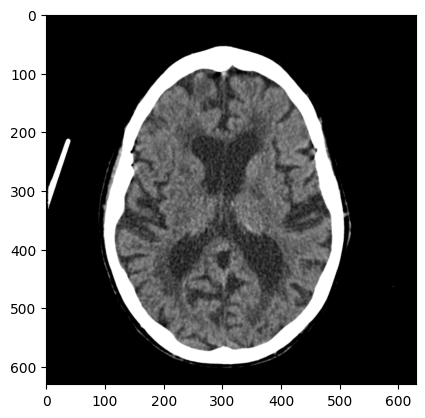

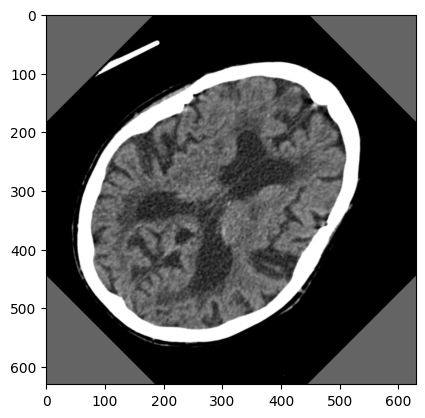

In [34]:
import itk
import numpy as np
import matplotlib.pyplot as plt

# Function to apply affine transform (rotation) and resample the image
def apply_affine_transform(input_image, angle_in_degrees):
    Dimension = 2
    
    # Define types for input and output images
    InputImageType = itk.Image[itk.UC, Dimension]
    OutputImageType = itk.Image[itk.UC, Dimension]

    # Define resampling filter and transform
    ResampleFilterType = itk.ResampleImageFilter[InputImageType, OutputImageType]
    resample_filter = ResampleFilterType.New()

    TransformType = itk.AffineTransform[itk.D, Dimension]
    transform = TransformType.New()

    # Get image properties
    spacing = input_image.GetSpacing()
    origin = input_image.GetOrigin()
    size = input_image.GetLargestPossibleRegion().GetSize()

    # Set output image properties
    resample_filter.SetOutputSpacing(spacing)
    resample_filter.SetOutputOrigin(origin)
    resample_filter.SetSize(size)
    resample_filter.SetOutputDirection(input_image.GetDirection())

    # Set interpolator
    InterpolatorType = itk.LinearInterpolateImageFunction[InputImageType, itk.D]
    interpolator = InterpolatorType.New()
    resample_filter.SetInterpolator(interpolator)
    
    # Set default pixel value for areas outside the image
    resample_filter.SetDefaultPixelValue(100)

    # Calculate the center of the image
    image_center_x = origin[0] + spacing[0] * size[0] / 2.0
    image_center_y = origin[1] + spacing[1] * size[1] / 2.0
    print(f"Image Center X: {image_center_x}, Y: {image_center_y}")

    # Translate the image center to the origin
    translation1 = np.array([-image_center_x, -image_center_y])
    transform.Translate(translation1)

    # Apply rotation (angle in radians)
    degrees_to_radians = np.pi / 180.0
    angle_in_radians = angle_in_degrees * degrees_to_radians
    transform.Rotate2D(-angle_in_radians, False)

    # Translate the image center back
    translation2 = np.array([image_center_x, image_center_y])
    transform.Translate(translation2, False)

    # Set the transform to the resample filter
    resample_filter.SetTransform(transform)
    resample_filter.SetInput(input_image)

    # Update the filter to process the image
    resample_filter.Update()

    return resample_filter.GetOutput()

# Function to plot the output image
def plot_image(image):
    image_array = itk.GetArrayViewFromImage(image)
    plt.imshow(image_array, cmap='gray')
    plt.axis('on')
    plt.title("Rotated Image")
    plt.show()

# Read an image from file
def load_image(input_image_path):
    InputImageType = itk.Image[itk.UC, 2]
    reader = itk.ImageFileReader[InputImageType].New()
    reader.SetFileName(input_image_path)
    reader.Update()
    return reader.GetOutput()

# Example usage
input_image_filename = "Brain_CT.jpg"  # Replace with the actual image path
output_image_filename = "rotated_output.png"

# Load the input image
input_image = load_image(input_image_filename)

# Apply the affine transform (rotate by 45 degrees as an example)
resampled_image = apply_affine_transform(input_image, angle_in_degrees=45)

# Optionally save the resampled image
itk.imwrite(resampled_image, output_image_filename)

#Plot the original image without caption
image_array = itk.GetArrayViewFromImage(input_image)
plt.imshow(image_array, cmap='gray')
plt.axis('on')
plt.show()

image_array = itk.GetArrayViewFromImage(resampled_image)
plt.imshow(image_array, cmap='gray')
plt.axis('on')
plt.show()